<a href="https://colab.research.google.com/github/Boso123/MLcourseFatiga/blob/master/Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot

# Analisis de los datos
Se analizan los datos para ver los columnas y su comportamiento

In [0]:
data = pd.read_csv("/content/drive/My Drive/MicrosuenosData/data.csv")

In [0]:
df = pd.DataFrame(data)

In [0]:
df.head()

,id,image,time,initial_time,pitch,yaw,roll,pitchs,yawns,tag
0,1,/images/image1.jpg,2019-07-21T23:31:23.712000,2019-07-21T23:31:23.068000,-0.823158,-2.251774,-3.297792,0,0,dormido
1,2,/images/image2.jpg,2019-07-21T23:31:23.901000,2019-07-21T23:31:23.068000,2.369261,-2.475782,-3.183843,0,0,dormido
2,3,/images/image3.jpg,2019-07-21T23:31:24.138000,2019-07-21T23:31:23.068000,2.628264,-2.748706,-3.297340,0,0,dormido
3,4,/images/image4.jpg,2019-07-21T23:31:23.068000,2019-07-21T23:31:23.068000,-2.992735,-3.298365,-3.120670,0,0,dormido
4,5,/images/image5.jpg,2019-07-21T23:31:23.327000,2019-07-21T23:31:23.068000,-2.326587,-4.130869,-3.623480,0,0,dormido


In [0]:
data.describe()

,id,pitch,yaw,roll,pitchs,yawns
count,9120.000000,9120.000000,9120.000000,9120.000000,9120.0,9120.000000
mean,4560.500000,19.980142,-26.126342,-7.424080,0.0,12.114145
std,2632.861561,13.578193,23.732697,12.651903,0.0,14.323186
min,1.000000,-25.995724,-67.263201,-178.874990,0.0,0.000000
25%,2280.750000,12.682690,-44.872878,-13.959442,0.0,1.000000
50%,4560.500000,19.658784,-30.843023,-8.462269,0.0,7.000000
75%,6840.250000,26.435971,-13.891117,-2.613671,0.0,18.000000
max,9120.000000,94.058592,61.573714,179.925438,0.0,98.000000


# Eliminación de variables
Al ver los datos que estan en el data set y los datos que estan en los mismos, podemos ver que los **cabeceos** son una variable a descartar. Ya que no se estan tomando correctamente en el dataset ya que este siempre es cero por lo que no aporta valor

In [0]:
to_drop = ['pitchs']

df.drop(to_drop, inplace=True, axis=1)
df.head()

,id,image,time,initial_time,pitch,yaw,roll,yawns,tag
0,1,/images/image1.jpg,2019-07-21T23:31:23.712000,2019-07-21T23:31:23.068000,-0.823158,-2.251774,-3.297792,0,dormido
1,2,/images/image2.jpg,2019-07-21T23:31:23.901000,2019-07-21T23:31:23.068000,2.369261,-2.475782,-3.183843,0,dormido
2,3,/images/image3.jpg,2019-07-21T23:31:24.138000,2019-07-21T23:31:23.068000,2.628264,-2.748706,-3.297340,0,dormido
3,4,/images/image4.jpg,2019-07-21T23:31:23.068000,2019-07-21T23:31:23.068000,-2.992735,-3.298365,-3.120670,0,dormido
4,5,/images/image5.jpg,2019-07-21T23:31:23.327000,2019-07-21T23:31:23.068000,-2.326587,-4.130869,-3.623480,0,dormido


Se verifica que los id's sean unicos y se asignan como los index para que pandas indentifique los registros por su id

In [0]:
df['id'].is_unique


True

In [0]:
df = df.set_index('id')
df.head()

,image,time,initial_time,pitch,yaw,roll,yawns,tag
id,,,,,,,,
1,/images/image1.jpg,2019-07-21T23:31:23.712000,2019-07-21T23:31:23.068000,-0.823158,-2.251774,-3.297792,0,dormido
2,/images/image2.jpg,2019-07-21T23:31:23.901000,2019-07-21T23:31:23.068000,2.369261,-2.475782,-3.183843,0,dormido
3,/images/image3.jpg,2019-07-21T23:31:24.138000,2019-07-21T23:31:23.068000,2.628264,-2.748706,-3.297340,0,dormido
4,/images/image4.jpg,2019-07-21T23:31:23.068000,2019-07-21T23:31:23.068000,-2.992735,-3.298365,-3.120670,0,dormido
5,/images/image5.jpg,2019-07-21T23:31:23.327000,2019-07-21T23:31:23.068000,-2.326587,-4.130869,-3.623480,0,dormido


Se analiza el registro 601 por sus caracteristicas

In [0]:
df.loc[601]

image                 /images/image601.jpg
time            2019-09-09T20:24:16.056000
initial_time    2019-09-09T20:24:15.963000
pitch                              4.81105
yaw                               -32.5474
roll                               3.55027
yawns                                   32
tag                                dormido
Name: 601, dtype: object

In [0]:
df.dtypes.value_counts()

object     4
float64    3
int64      1
dtype: int64

In [0]:
df.loc[601:, 'initial_time'].head(18)

id
601    2019-09-09T20:24:15.963000
602    2019-09-09T20:24:15.963000
603    2019-09-09T20:24:15.963000
604    2019-09-09T20:24:15.963000
605    2019-09-09T20:24:15.963000
606    2019-09-09T20:24:15.963000
607    2019-09-09T20:24:17.390000
608    2019-09-09T20:24:17.390000
609    2019-09-09T20:24:17.390000
610    2019-09-09T20:24:17.390000
611    2019-09-09T20:24:17.390000
612    2019-09-09T20:24:17.390000
613    2019-09-09T20:24:22.115000
614    2019-09-09T20:24:22.115000
615    2019-09-09T20:24:22.115000
616    2019-09-09T20:24:22.115000
617    2019-09-09T20:24:22.115000
618    2019-09-09T20:24:22.115000
Name: initial_time, dtype: object

# Se analizan los datos en un diagrama de caja, histograma, series por tiempo para cada variable y diagramas de disperción
Se calculan los cuartillos de las columnas pitch, yaw, roll, yawns
Y los comportamientos de las variables

dormido    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

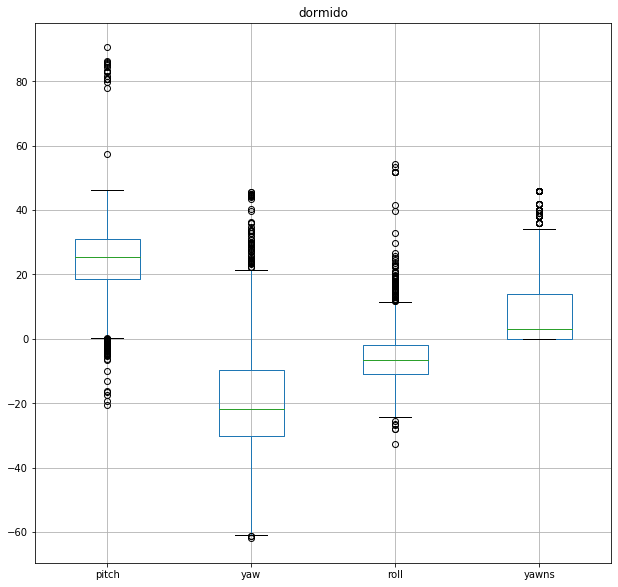

In [0]:
df.groupby('tag').boxplot(column=["pitch", "yaw", "roll", "yawns"], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07cbff6358>,
      dtype=object)

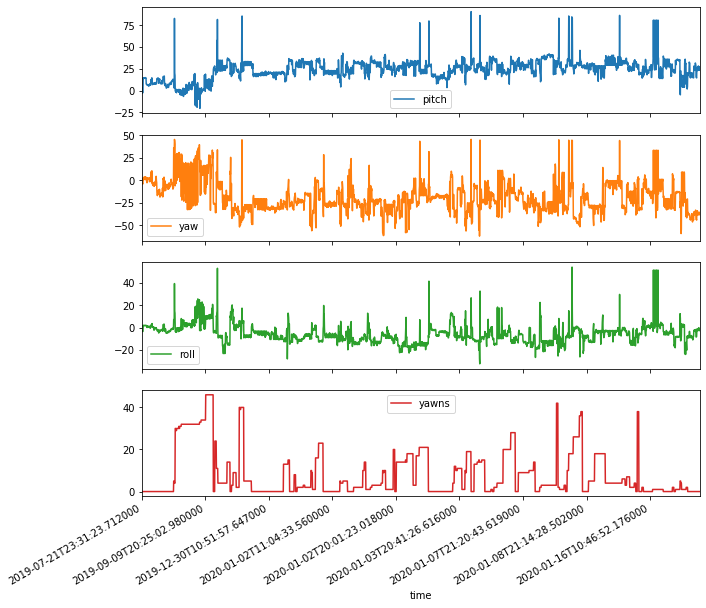

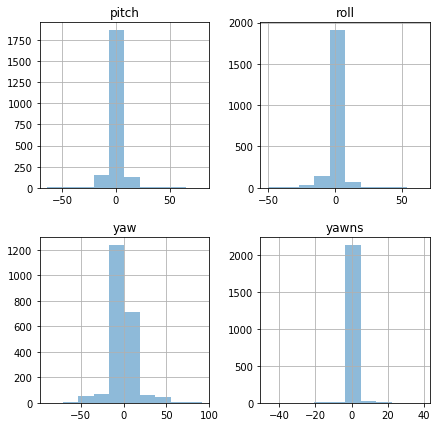

In [0]:
df.groupby('tag').plot(x='time', figsize=(10,10), subplots=True)
df.groupby('tag').diff().hist(alpha=0.5, stacked=True, figsize=(7,7))

In [0]:
Se mira el mapa de disperción de las coordenadas de la cabeza y su relación con 
la cantidad de boztesos de la persona

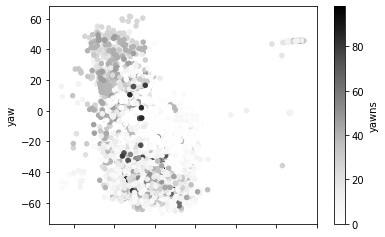

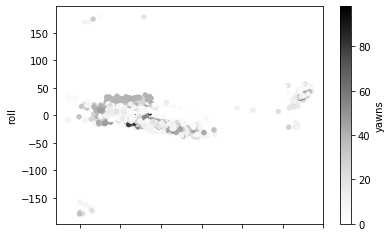

In [0]:
df.plot.scatter(x='pitch', y='yaw', c='yawns')
df.plot.scatter(x='pitch', y='roll', c='yawns')

# Se separa el conjunto de prueba
Se sapara el conjunto del dataset que posee una etiqueta

In [0]:
df[df.tag == 'dormido'].groupby(['tag', 'image', 'initial_time']).mean()

pitch  ...  yawns
tag     image                initial_time                           ...       
dormido /images/image1.jpg   2019-07-21T23:31:23.068000  -0.823158  ...      0
        /images/image10.jpg  2019-08-09T19:54:49.683000  14.119639  ...      0
        /images/image100.jpg 2019-08-09T19:56:04.019000   3.712679  ...      0
        /images/image101.jpg 2019-08-09T19:56:04.019000   3.964994  ...      0
        /images/image102.jpg 2019-08-09T19:56:04.019000   5.137322  ...      0
...                                                            ...  ...    ...
        /images/image95.jpg  2019-08-09T19:56:02.688000   8.073534  ...      0
        /images/image96.jpg  2019-08-09T19:56:02.688000   6.475881  ...      0
        /images/image97.jpg  2019-08-09T19:56:04.019000   4.032309  ...      0
        /images/image98.jpg  2019-08-09T19:56:04.019000   2.775606  ...      0
        /images/image99.jpg  2019-08-09T19:56:04.019000   2.895969  ...      0

[2196 rows x 4 columns]